In [279]:
import numpy as np
import pandas as pd
import os
import sys

import re
import json

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.colorbar as colorbar
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
from matplotlib import rc
from matplotlib import rcParams
from matplotlib import cm
from matplotlib import colors
# cycler for setting color cycles
from cycler import cycler
import seaborn as sns

# remove warnings
import warnings
warnings.filterwarnings('ignore')


In [280]:
# Set the default color cycle
# color_cycle = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
color_cycle = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
rc('axes', prop_cycle=(cycler('color', color_cycle)))

In [281]:
# opening the data file
df_mf = pd.read_csv('playground-series-s3e17/train.csv')

In [282]:
df_mf.head(5)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [283]:
df_mf.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [246]:
# looking for duplicates
df_mf.duplicated().sum()


0

In [247]:
# looking for missing values
df_mf.isnull().sum()


id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [248]:
df_mf.describe().T

,count,mean,std,min,25%,50%,75%,max
id,136429.0,68214.000000,39383.804275,0.0,34107.0,68214.0,102321.0,136428.0
Air temperature [K],136429.0,299.862776,1.862247,295.3,298.3,300.0,301.2,304.4
Process temperature [K],136429.0,309.941070,1.385173,305.8,308.7,310.0,310.9,313.8
Rotational speed [rpm],136429.0,1520.331110,138.736632,1181.0,1432.0,1493.0,1580.0,2886.0
Torque [Nm],136429.0,40.348643,8.502229,3.8,34.6,40.4,46.1,76.6
Tool wear [min],136429.0,104.408901,63.965040,0.0,48.0,106.0,159.0,253.0
Machine failure,136429.0,0.015744,0.124486,0.0,0.0,0.0,0.0,1.0
TWF,136429.0,0.001554,0.039389,0.0,0.0,0.0,0.0,1.0
HDF,136429.0,0.005160,0.071649,0.0,0.0,0.0,0.0,1.0
PWF,136429.0,0.002397,0.048899,0.0,0.0,0.0,0.0,1.0


In [249]:
df_mf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [250]:
df_mf.dtypes

id                           int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [251]:
# number of unique values in each column
df_mf.nunique()

id                         136429
Product ID                   9976
Type                            3
Air temperature [K]            95
Process temperature [K]        81
Rotational speed [rpm]        952
Torque [Nm]                   611
Tool wear [min]               246
Machine failure                 2
TWF                             2
HDF                             2
PWF                             2
OSF                             2
RNF                             2
dtype: int64

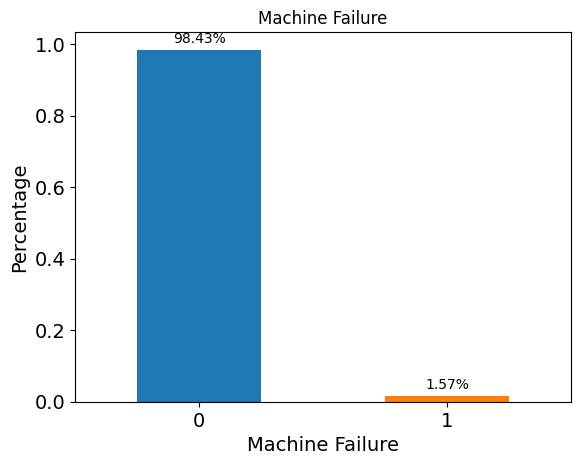

In [252]:
# value counts for Machine Failure
df_mf['Machine failure'].value_counts(normalize=True).plot(kind='bar', title='Machine Failure', color=color_cycle[0:2])
plt.ylabel('Percentage', fontsize=14)
plt.xlabel('Machine Failure', fontsize=14)
plt.xticks(rotation=0, ha='center', fontsize=14)
plt.yticks(fontsize=14, rotation=0, ha='right')
# annotate the plot
plt.annotate(f"{df_mf['Machine failure'].value_counts(normalize=True)[0]*100:.2f}%", (0, df_mf['Machine failure'].value_counts(normalize=True)[0]), textcoords="offset points", xytext=(0,5), ha='center')
plt.annotate(f"{df_mf['Machine failure'].value_counts(normalize=True)[1]*100:.2f}%", (1, df_mf['Machine failure'].value_counts(normalize=True)[1]), textcoords="offset points", xytext=(0,5), ha='center')
plt.show()

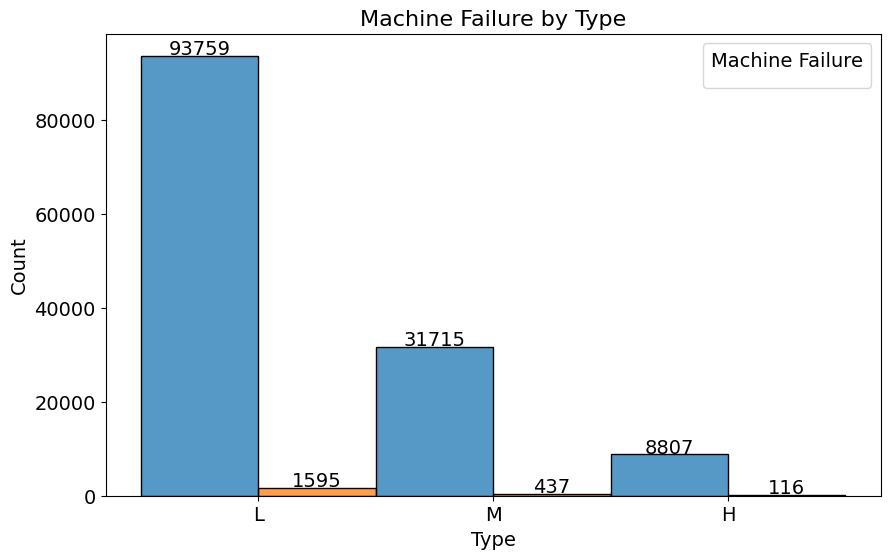

In [253]:
# value counts for Machine failure by Type with seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df_mf, x='Type', hue='Machine failure', 
              palette=color_cycle[0:2], multiple='dodge')
plt.title('Machine Failure by Type', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Type', fontsize=14)
plt.xticks(rotation=0, ha='center', fontsize=14)
plt.yticks(fontsize=14, rotation=0, ha='right')
plt.legend(title='Machine Failure', fontsize=14, title_fontsize=14)
# annotate the plot
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()


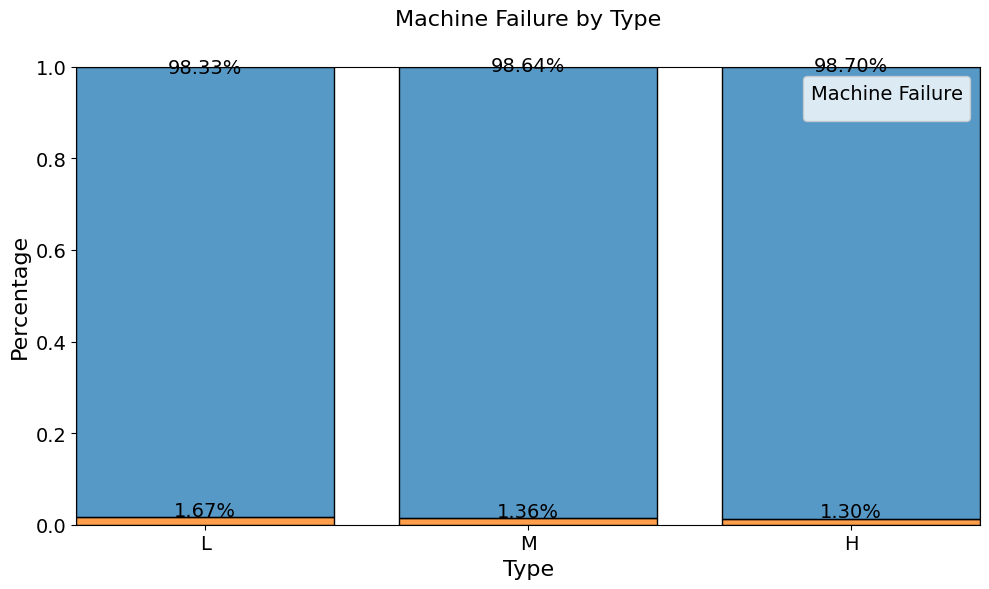

In [254]:
# value counts for Machine failure by Type with seaborn, normalized
plt.figure(figsize=(10, 6))
sns.histplot(data=df_mf, x='Type', hue='Machine failure', 
              palette=color_cycle[0:2], multiple='fill', shrink=.8)
plt.title('Machine Failure by Type', fontsize=16, pad=30)
plt.ylabel('Percentage', fontsize=16)
plt.xlabel('Type', fontsize=16)
plt.xticks(rotation=0, ha='center', fontsize=14)
plt.yticks(fontsize=14, rotation=0, ha='right')
plt.legend(title='Machine Failure', fontsize=14, title_fontsize=14)
# annotate the plot
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height()*100:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()



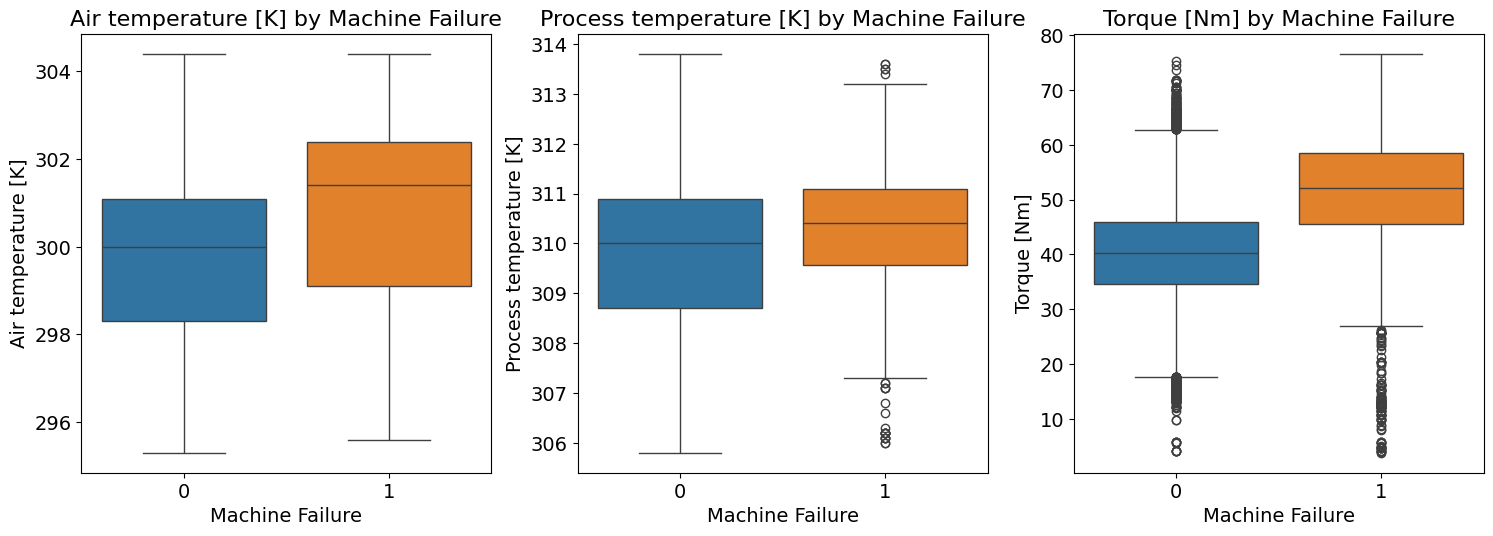

In [255]:
# boxplot for float64 columns in subplots with seaborn
plt.figure(figsize=(20, 10))
for i, col in enumerate(df_mf.select_dtypes('float64').columns):
    plt.subplot(2, 4, i+1)
    sns.boxplot(data=df_mf, y=col, x='Machine failure', palette=color_cycle[0:2])
    plt.title(f'{col} by Machine Failure', fontsize=16)
    plt.ylabel(col, fontsize=14)
    plt.xlabel('Machine Failure', fontsize=14)
    plt.xticks(rotation=0, ha='center', fontsize=14)
    plt.yticks(fontsize=14, rotation=0, ha='right')
plt.tight_layout()
plt.show()

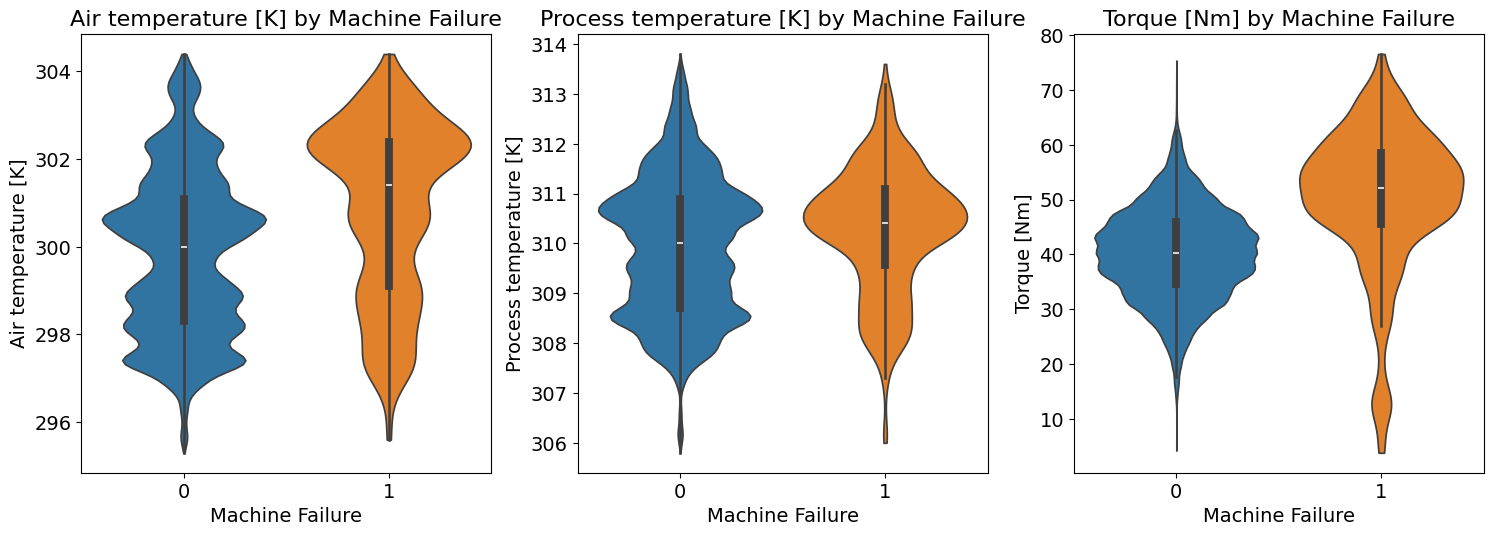

In [256]:
# boxplot for float64 columns in subplots with seaborn
plt.figure(figsize=(20, 10))
for i, col in enumerate(df_mf.select_dtypes('float64').columns):
    plt.subplot(2, 4, i+1)
    sns.violinplot(data=df_mf, y=col, cut=0, x='Machine failure', palette=color_cycle[0:2])
    plt.title(f'{col} by Machine Failure', fontsize=16)
    plt.ylabel(col, fontsize=14)
    plt.xlabel('Machine Failure', fontsize=14)
    plt.xticks(rotation=0, ha='center', fontsize=14)
    plt.yticks(fontsize=14, rotation=0, ha='right')
plt.tight_layout()
plt.show()

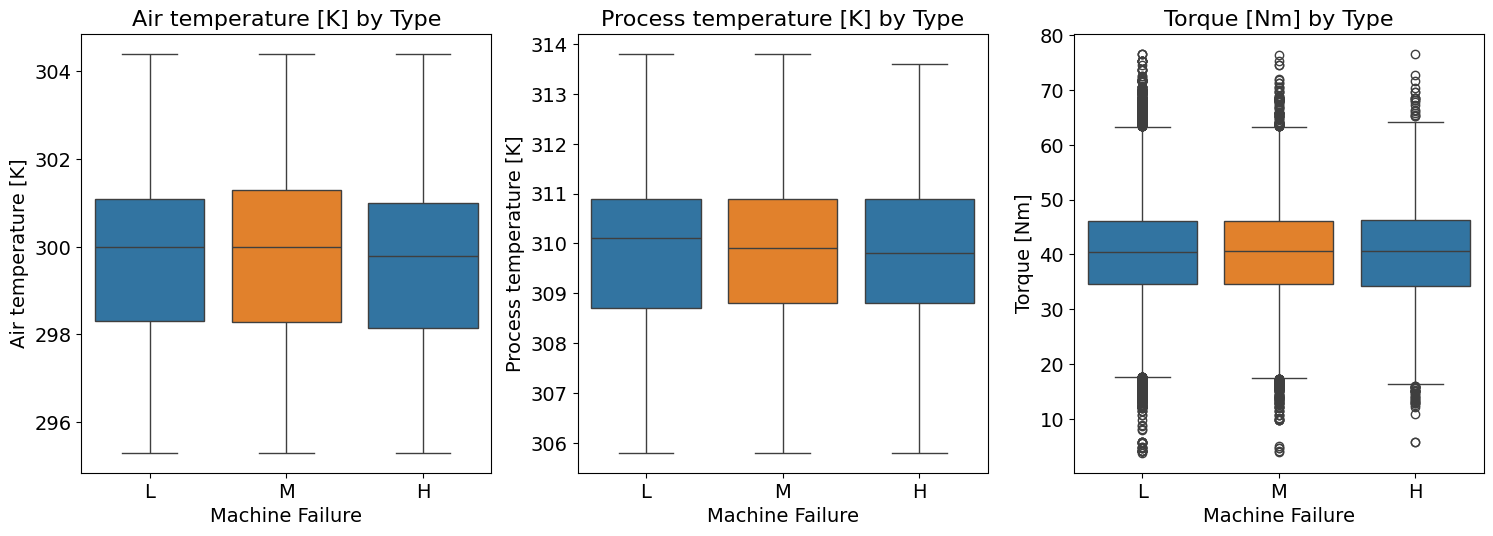

In [257]:
# boxplot for float64 columns in subplots with seaborn
plt.figure(figsize=(20, 10))
for i, col in enumerate(df_mf.select_dtypes('float64').columns):
    plt.subplot(2, 4, i+1)
    sns.boxplot(data=df_mf, y=col, x='Type', palette=color_cycle[0:2])
    plt.title(f'{col} by Type', fontsize=16)
    plt.ylabel(col, fontsize=14)
    plt.xlabel('Machine Failure', fontsize=14)
    plt.xticks(rotation=0, ha='center', fontsize=14)
    plt.yticks(fontsize=14, rotation=0, ha='right')
plt.tight_layout()
plt.show()

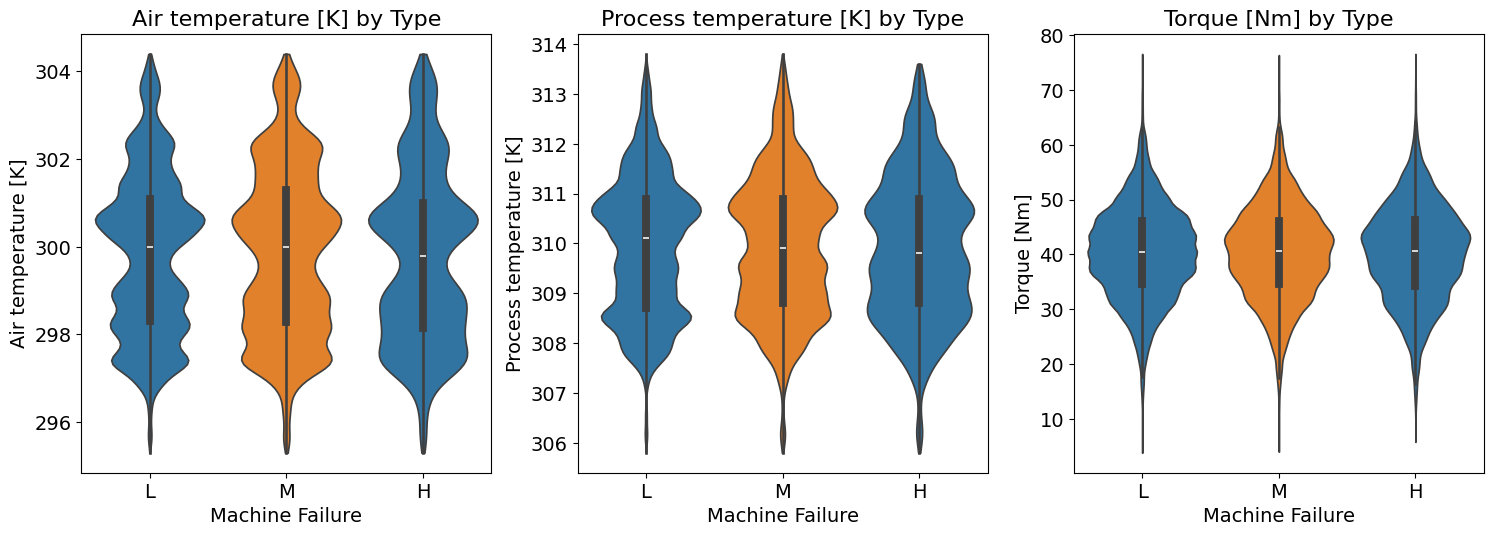

In [258]:
# boxplot for float64 columns in subplots with seaborn
plt.figure(figsize=(20, 10))
for i, col in enumerate(df_mf.select_dtypes('float64').columns):
    plt.subplot(2, 4, i+1)
    sns.violinplot(data=df_mf, y=col, cut=0, x='Type', palette=color_cycle[0:2])
    plt.title(f'{col} by Type', fontsize=16)
    plt.ylabel(col, fontsize=14)
    plt.xlabel('Machine Failure', fontsize=14)
    plt.xticks(rotation=0, ha='center', fontsize=14)
    plt.yticks(fontsize=14, rotation=0, ha='right')
plt.tight_layout()
plt.show()

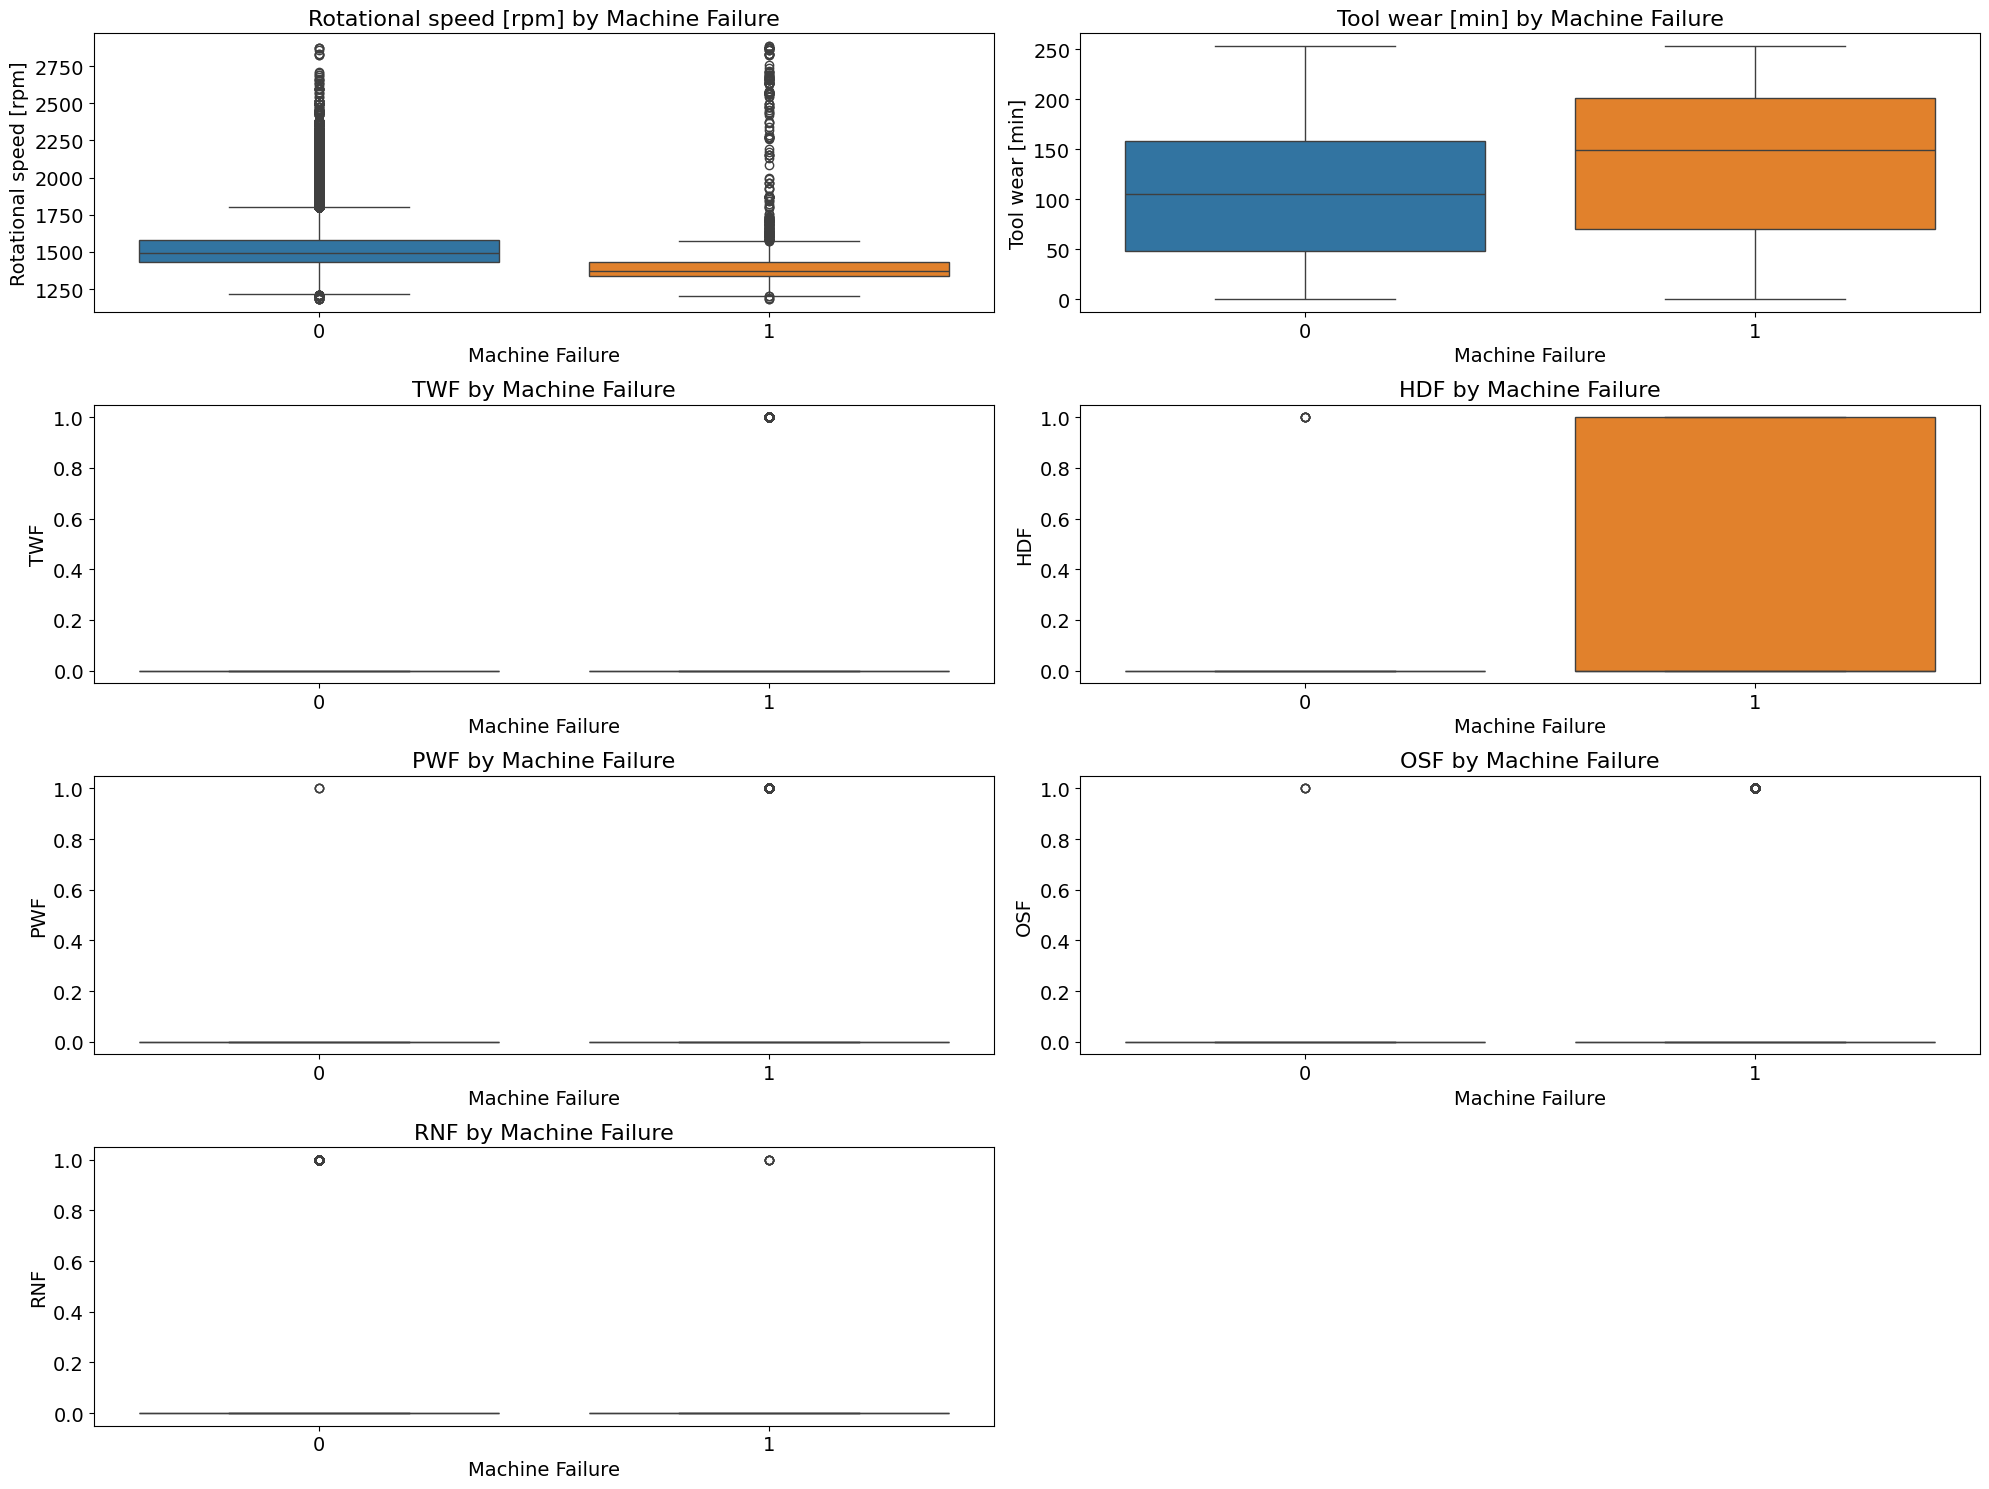

In [259]:
# do the same for int64 columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(df_mf.drop(columns=['id','Machine failure']).select_dtypes('int64').columns):
    plt.subplot(4, 2, i+1)
    sns.boxplot(data=df_mf, y=col, x='Machine failure', palette=color_cycle[0:2])
    plt.title(f'{col} by Machine Failure', fontsize=16)
    plt.ylabel(col, fontsize=14)
    plt.xlabel('Machine Failure', fontsize=14)
    plt.xticks(rotation=0, ha='center', fontsize=14)
    plt.yticks(fontsize=14, rotation=0, ha='right')
plt.tight_layout()
plt.show()


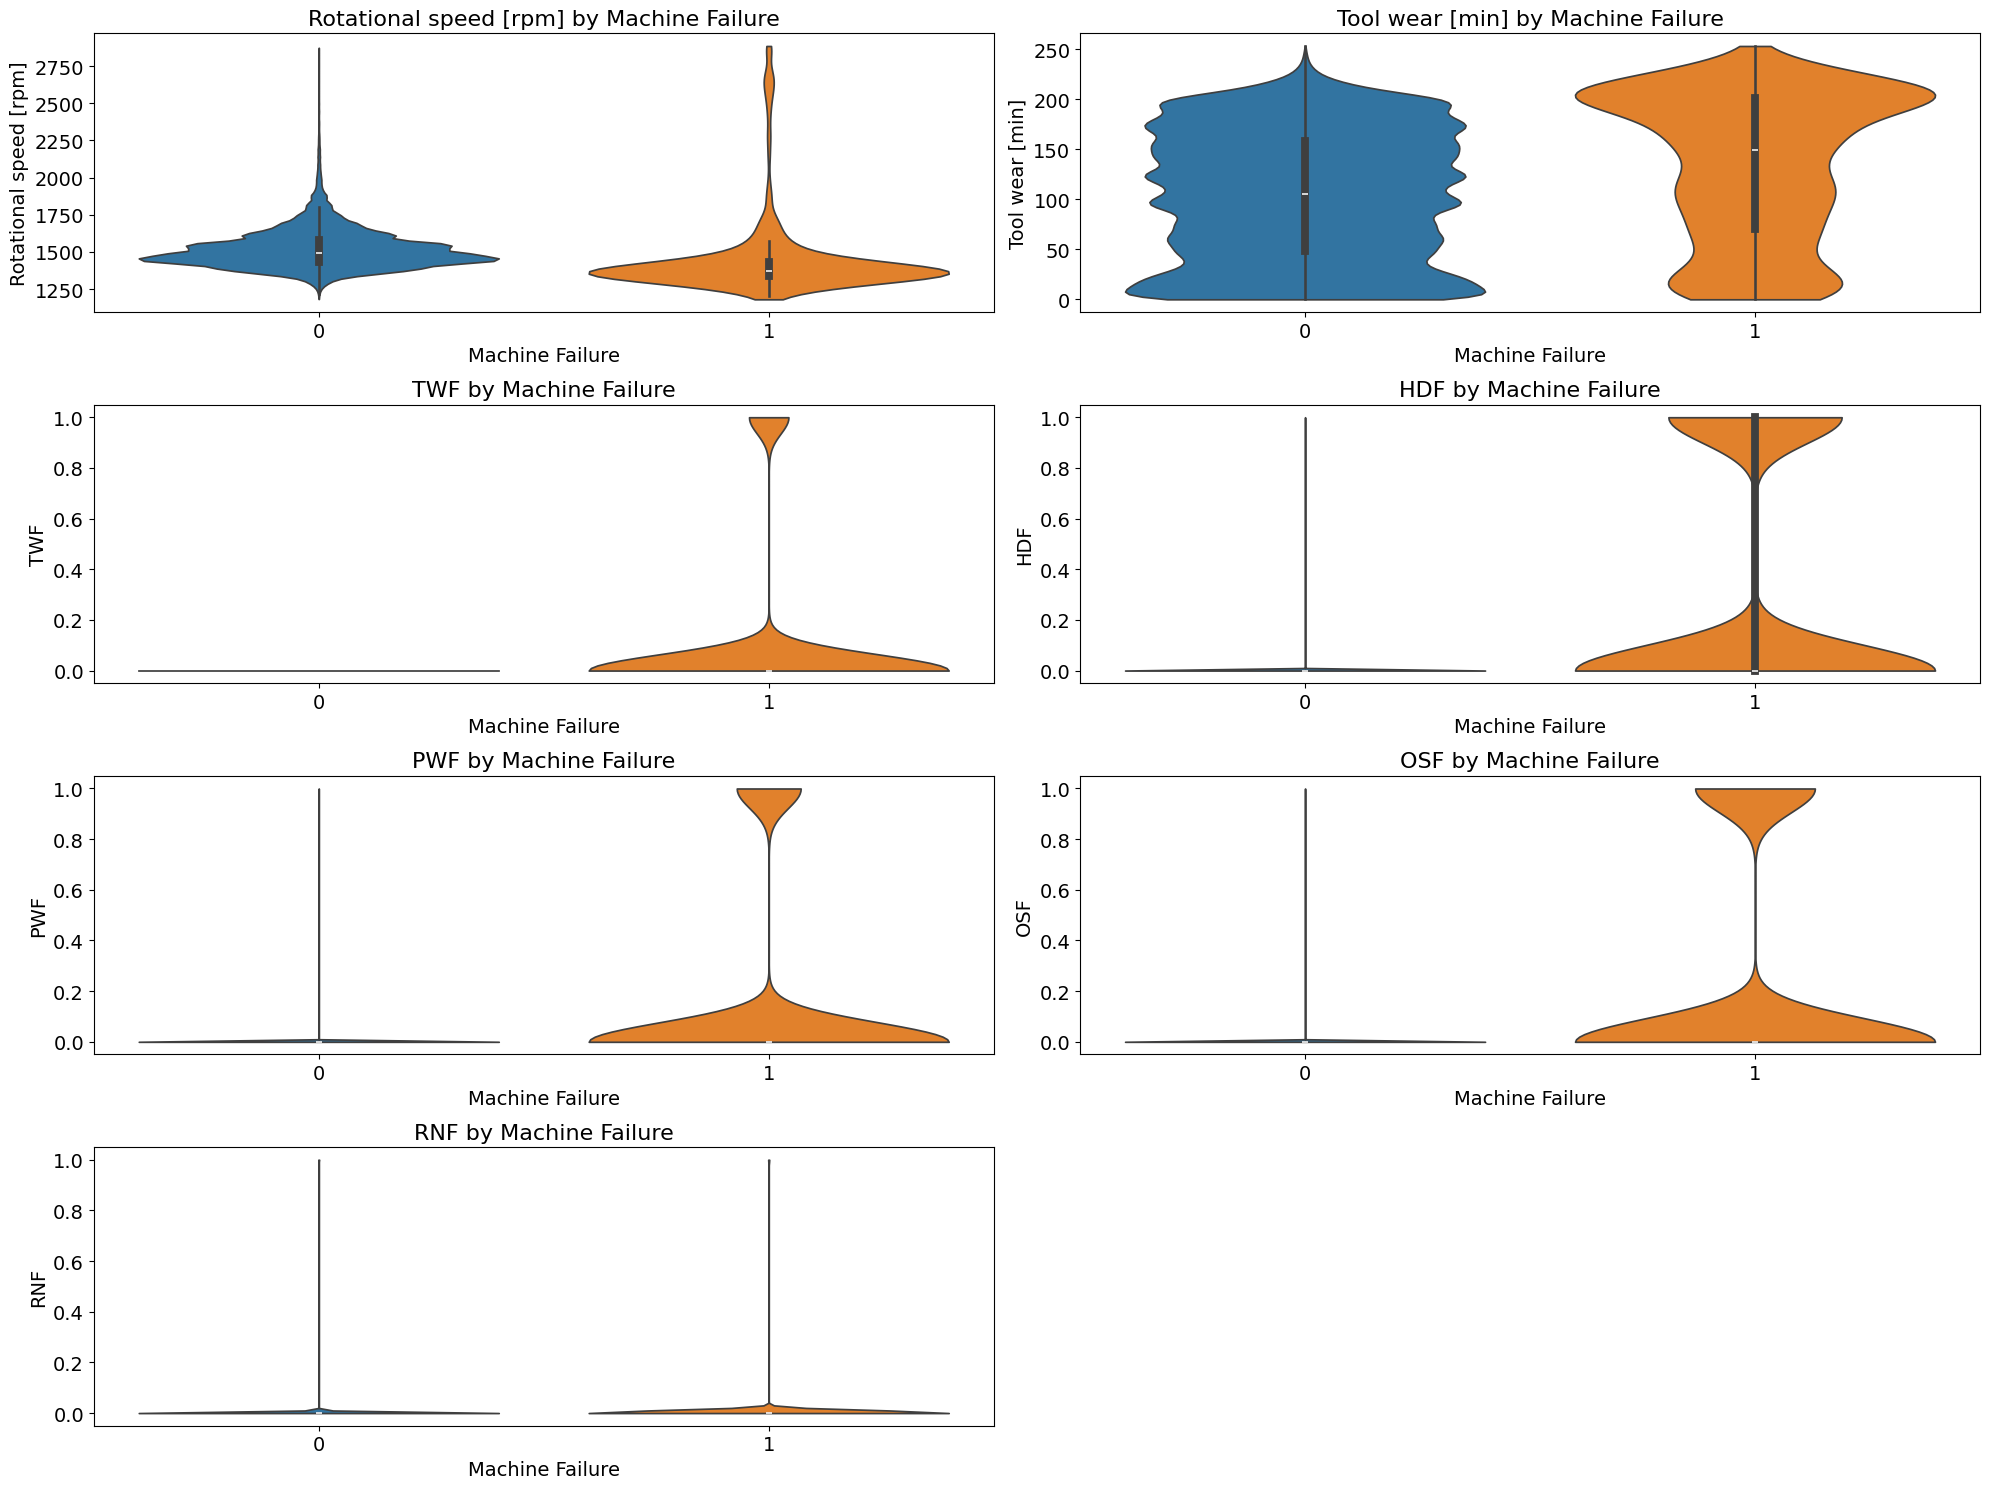

In [260]:
# do the same for int64 columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(df_mf.drop(columns=['id','Machine failure']).select_dtypes('int64').columns):
    plt.subplot(4, 2, i+1)
    sns.violinplot(data=df_mf, y=col, cut=0, x='Machine failure', palette=color_cycle[0:2])
    plt.title(f'{col} by Machine Failure', fontsize=16)
    plt.ylabel(col, fontsize=14)
    plt.xlabel('Machine Failure', fontsize=14)
    plt.xticks(rotation=0, ha='center', fontsize=14)
    plt.yticks(fontsize=14, rotation=0, ha='right')
plt.tight_layout()
plt.show()


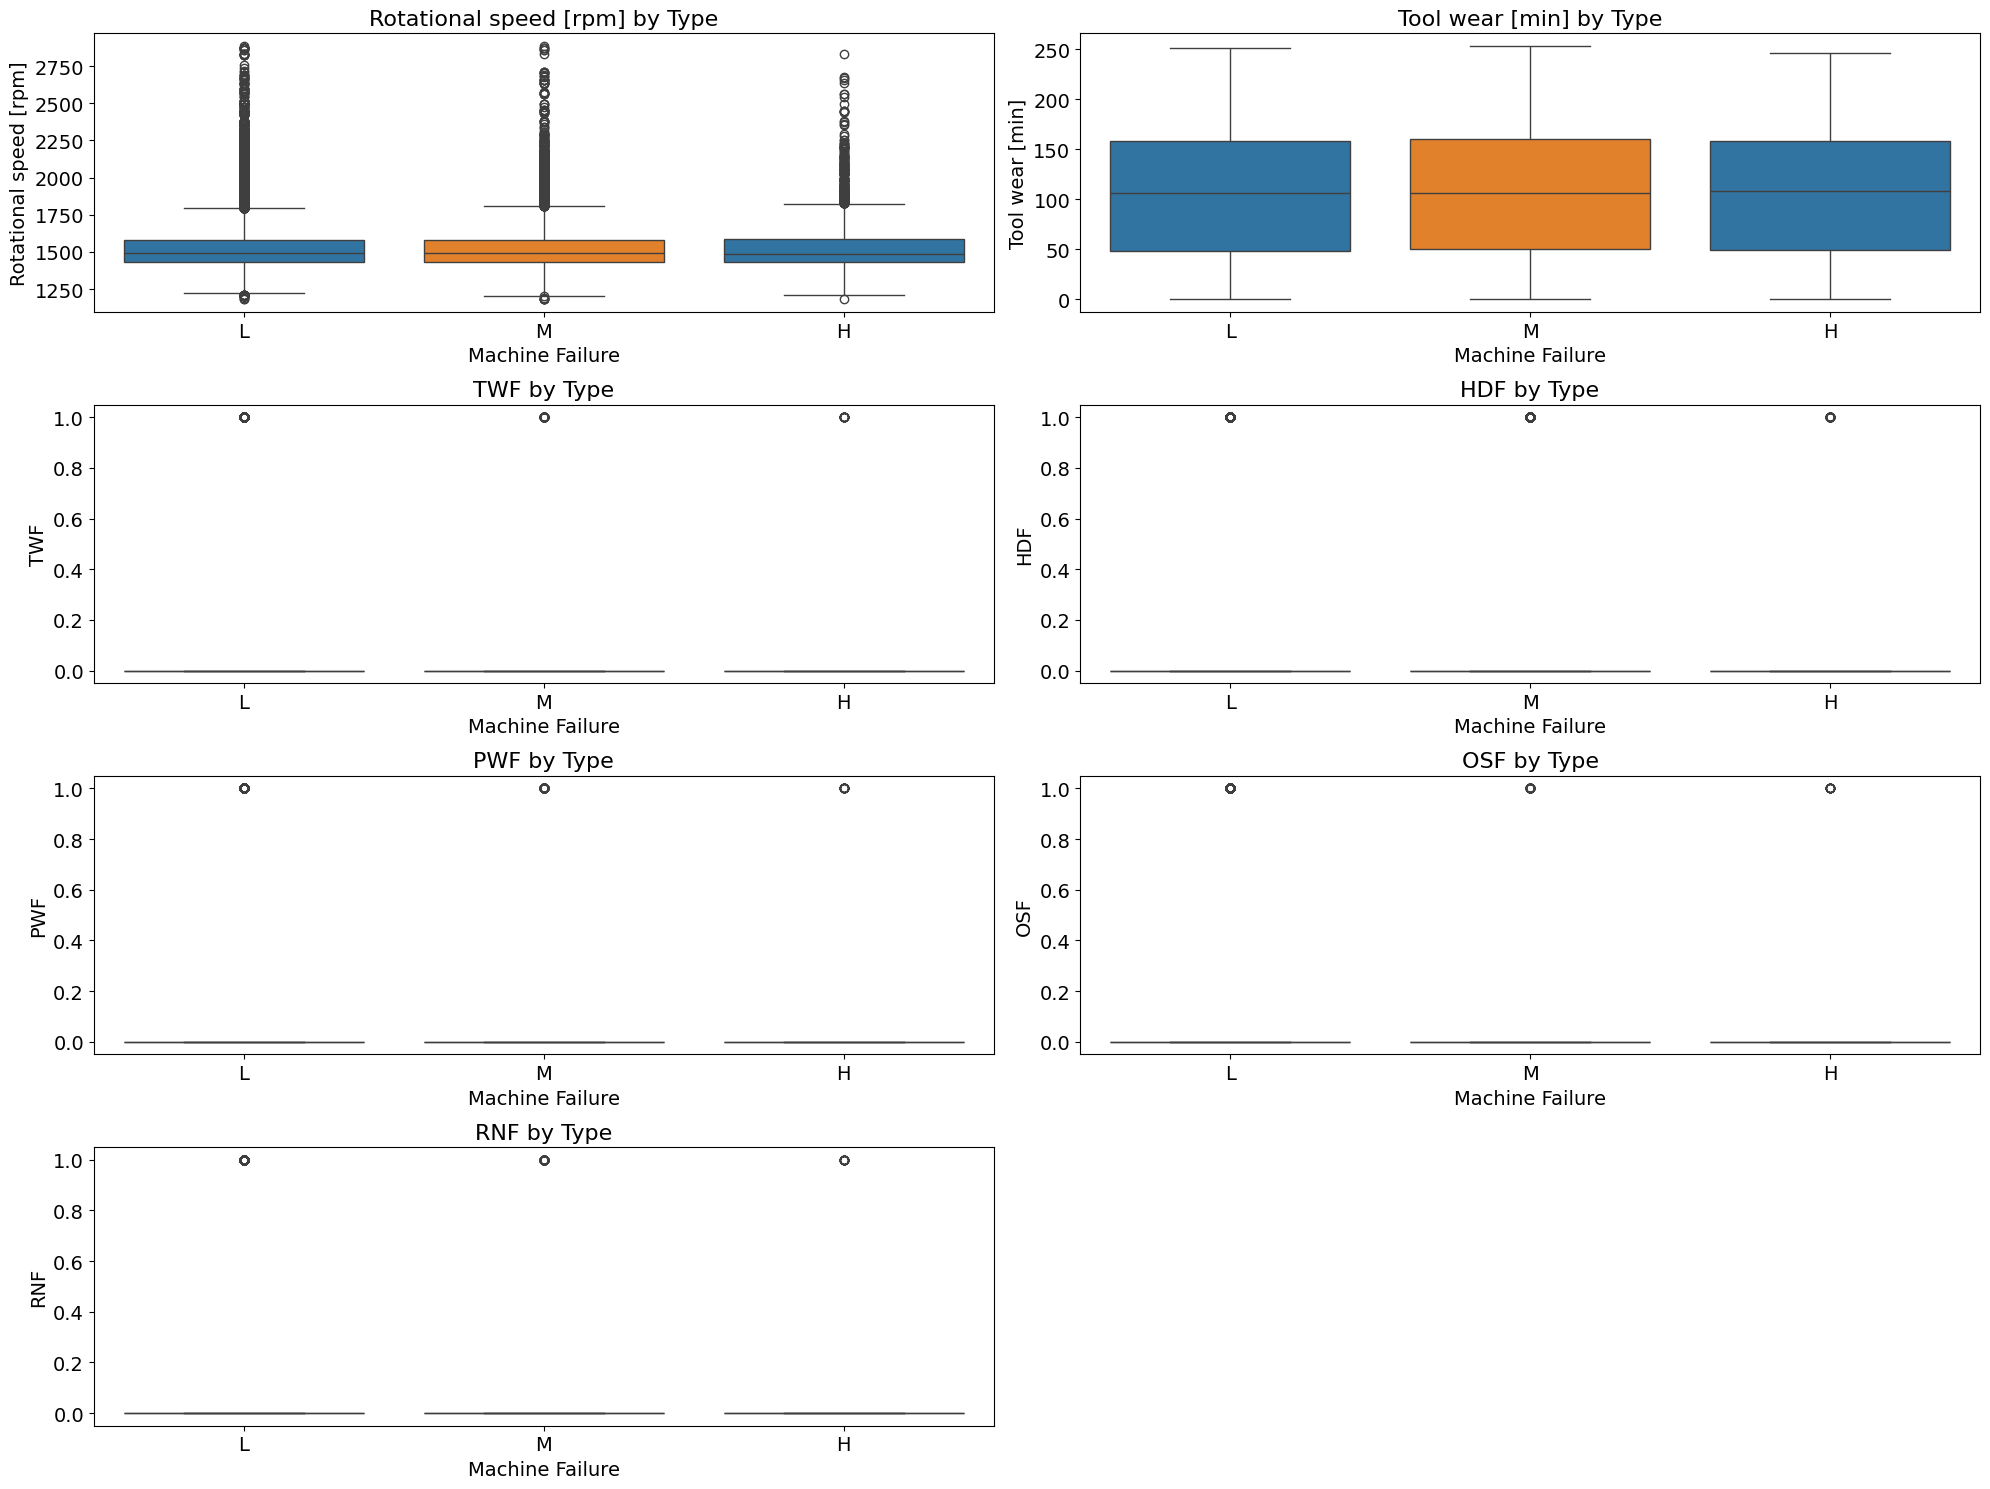

In [261]:
# do the same for int64 columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(df_mf.drop(columns=['id','Machine failure']).select_dtypes('int64').columns):
    plt.subplot(4, 2, i+1)
    sns.boxplot(data=df_mf, y=col, x='Type', palette=color_cycle[0:2])
    plt.title(f'{col} by Type', fontsize=16)
    plt.ylabel(col, fontsize=14)
    plt.xlabel('Machine Failure', fontsize=14)
    plt.xticks(rotation=0, ha='center', fontsize=14)
    plt.yticks(fontsize=14, rotation=0, ha='right')
plt.tight_layout()
plt.show()

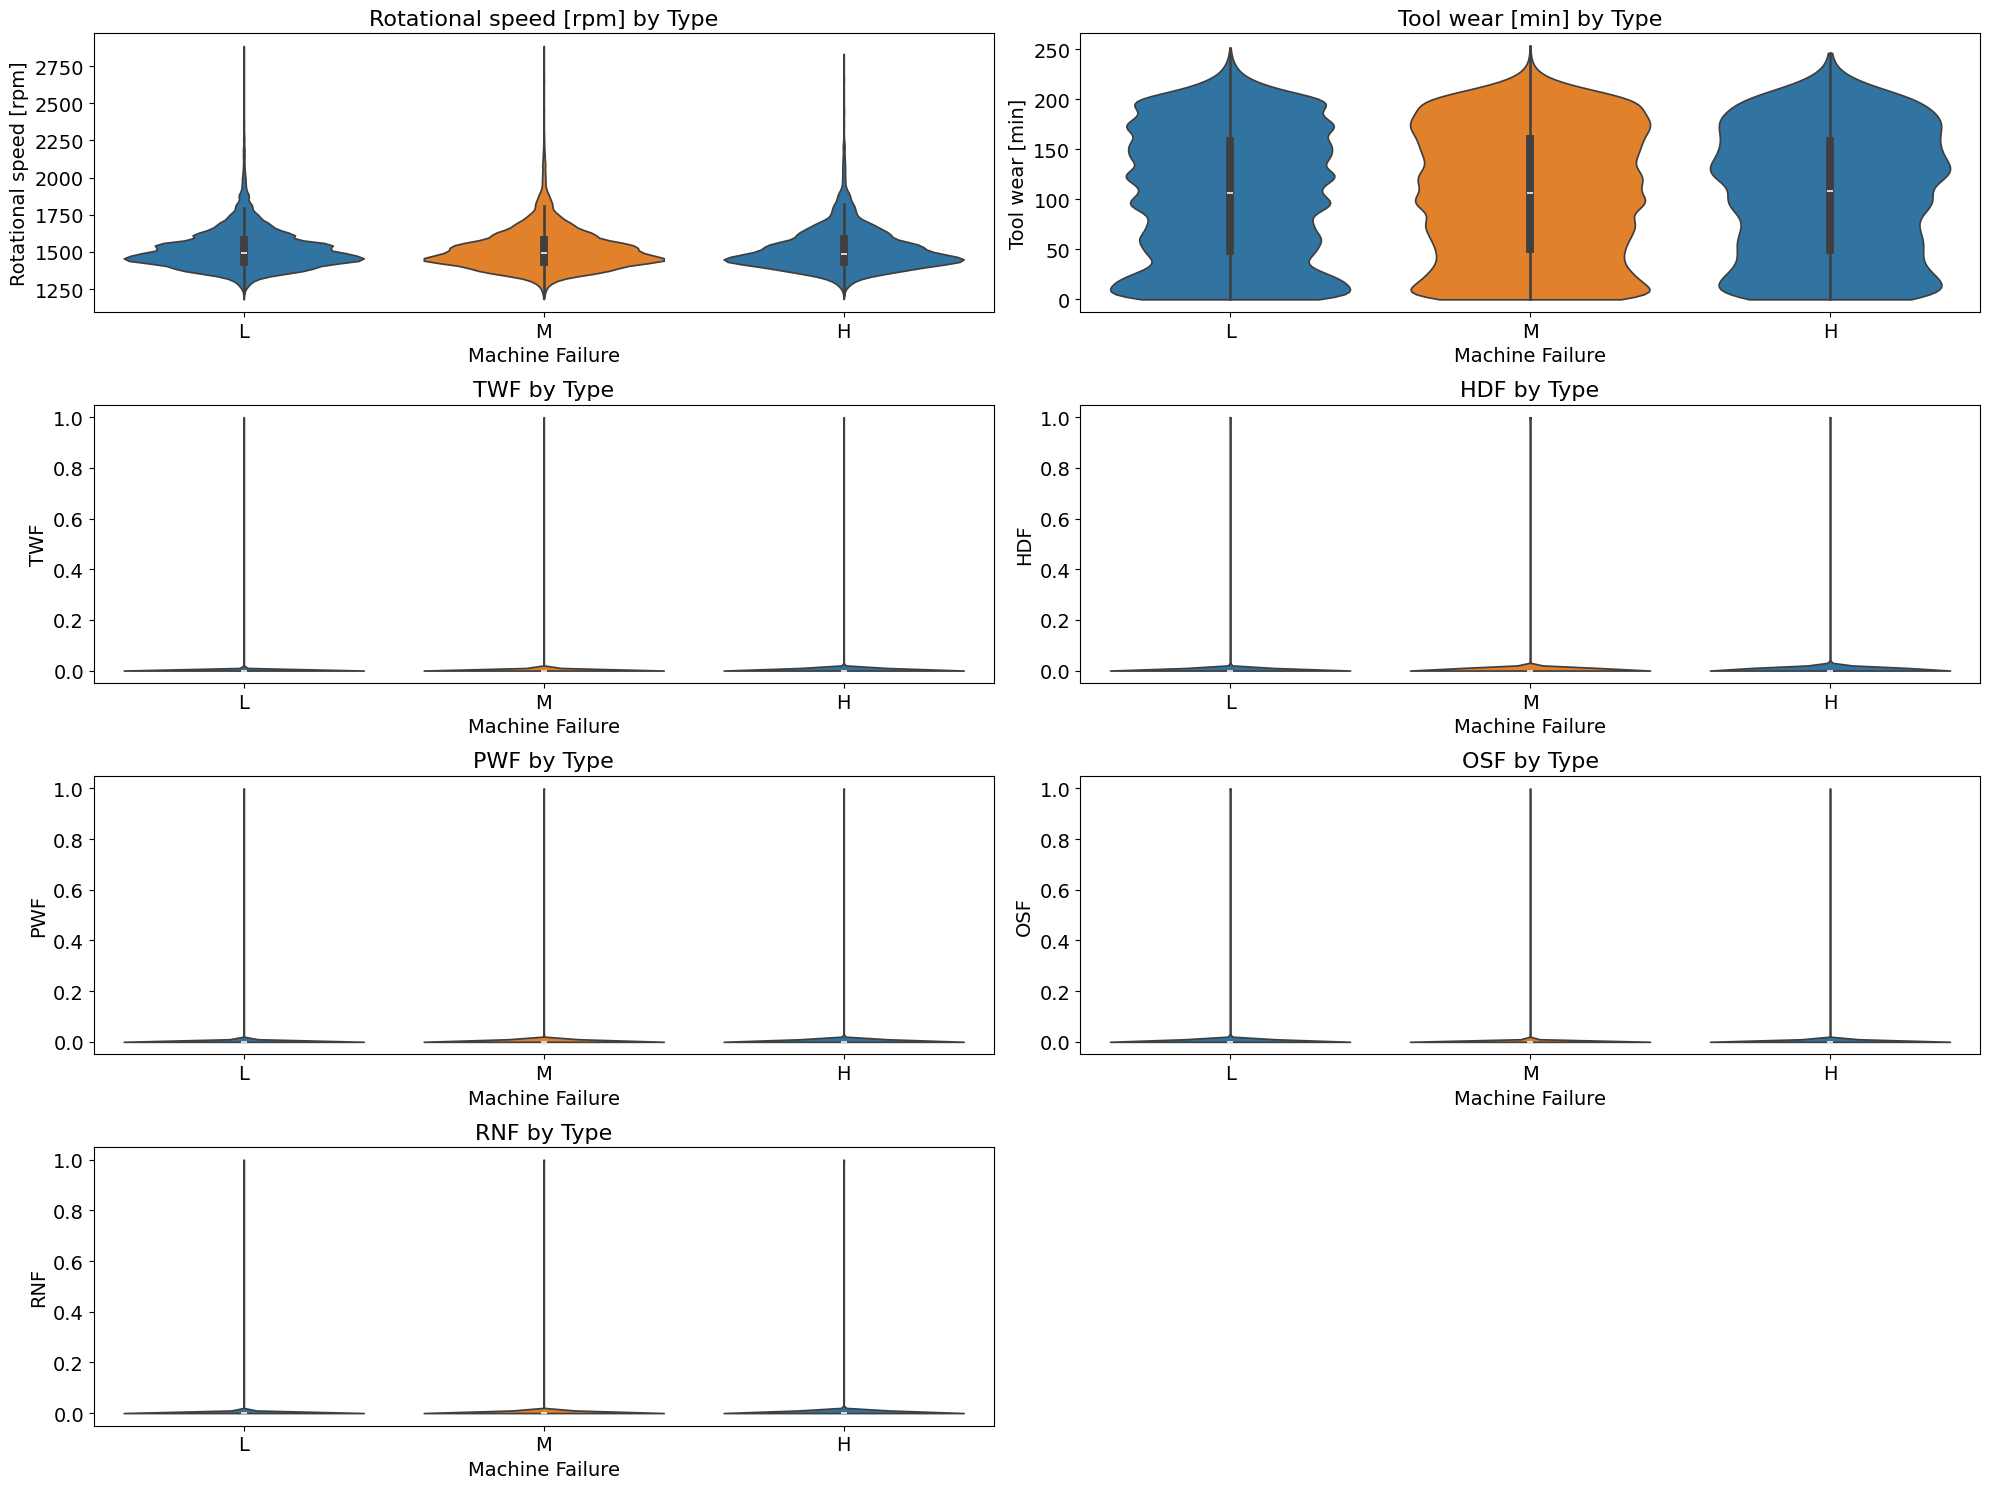

In [262]:
# do the same for int64 columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(df_mf.drop(columns=['id','Machine failure']).select_dtypes('int64').columns):
    plt.subplot(4, 2, i+1)
    sns.violinplot(data=df_mf,cut=0, y=col, x='Type', palette=color_cycle[0:2])
    plt.title(f'{col} by Type', fontsize=16)
    plt.ylabel(col, fontsize=14)
    plt.xlabel('Machine Failure', fontsize=14)
    plt.xticks(rotation=0, ha='center', fontsize=14)
    plt.yticks(fontsize=14, rotation=0, ha='right')
plt.tight_layout()
plt.show()


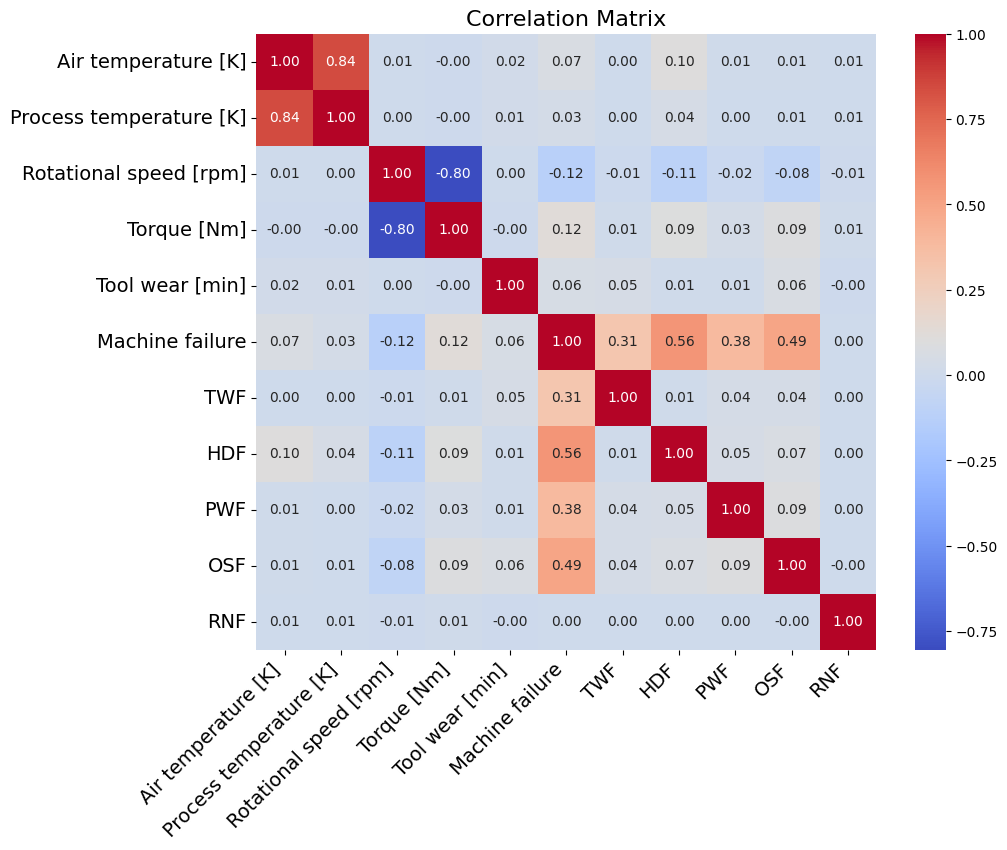

In [263]:
# correlation matrix
corr = df_mf.drop(columns=['id','Product ID','Type']).corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(rotation=0, ha='right', fontsize=14)
plt.show()

In [264]:
# correlation in triangle form
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr2 = corr.mask(mask)
# remove the highly correlated columns
high_corr = corr2[(np.abs(corr2) > 0.8) & (np.abs(corr2) < 1)].stack().index.tolist()
high_corr = [(i[0]) for i in high_corr]
df_mf.drop(columns=high_corr, inplace=True)
#df_mf.drop(columns=['id','Product ID','Type']).corr(method='spearman')['Machine failure'].sort_values(ascending=False)

In [265]:
df_mf

,id,Product ID,Type,Air temperature [K],Rotational speed [rpm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,1596,140,0,0,0,0,0,0
1,1,M20343,M,302.6,1759,200,0,0,0,0,0,0
2,2,L49454,L,299.3,1805,25,0,0,0,0,0,0
3,3,L53355,L,301.0,1524,197,0,0,0,0,0,0
4,4,M24050,M,298.0,1641,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,1530,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,1447,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,1524,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,1447,42,0,0,0,0,0,0


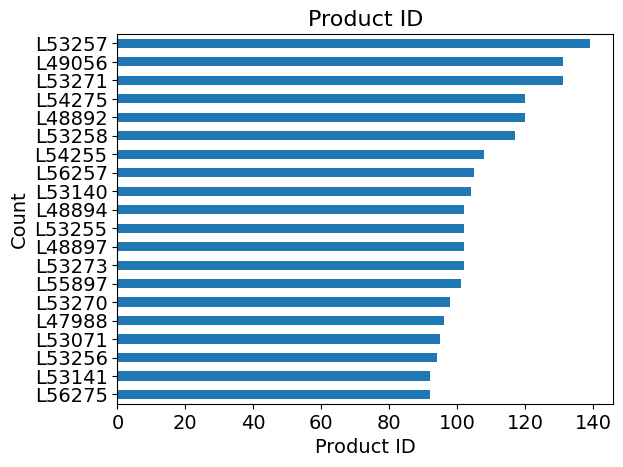

In [266]:
# analyze by Product ID the 20 most frequent
df_mf['Product ID'].value_counts().head(20).sort_values().plot(kind='barh', color=color_cycle[0])
plt.title('Product ID', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Product ID', fontsize=14)
plt.xticks(rotation=0, ha='center', fontsize=14)
plt.yticks(fontsize=14, rotation=0, ha='right')
plt.show()

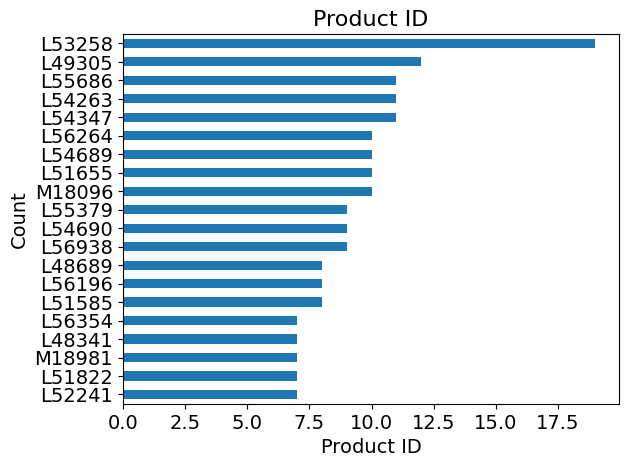

In [267]:
list_prod_id = list(df_mf[df_mf['Machine failure']==1]['Product ID'].value_counts().head(20).index)
df_mf_prod_id = df_mf[df_mf['Machine failure']==1]
df_mf_prod_id = df_mf_prod_id[df_mf_prod_id['Product ID'].isin(list_prod_id)]
df_mf_prod_id['Product ID'].value_counts().sort_values().plot(kind='barh', color=color_cycle[0])
plt.title('Product ID', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Product ID', fontsize=14)
plt.xticks(rotation=0, ha='center', fontsize=14)
plt.yticks(fontsize=14, rotation=0, ha='right')
plt.show()

In [268]:
df_mf_prod_id = df_mf
df_failure_rate = 100*df_mf_prod_id.groupby('Product ID')['Machine failure'].mean().sort_values(ascending=False)

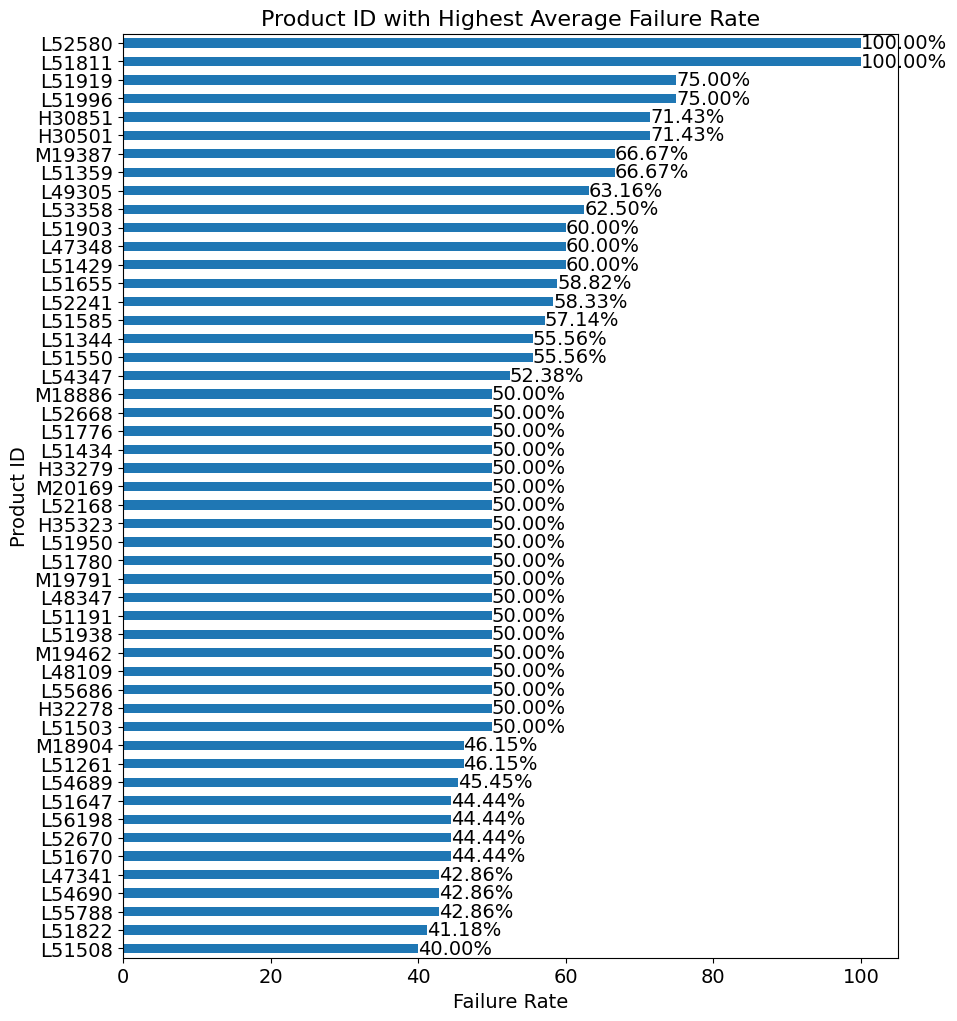

In [269]:
# obtain the top 20 Product ID with the highest failure rate
df_failure_rate.sort_values(ascending=False).head(50).sort_values().plot(kind='barh', color=color_cycle[0], figsize=(10, 12))
plt.title('Product ID with Highest Average Failure Rate', fontsize=16)
plt.ylabel('Product ID', fontsize=14)
plt.xlabel('Failure Rate', fontsize=14)
# put the percentage on the bars
for i, v in enumerate(df_failure_rate.sort_values(ascending=False).head(50).sort_values()):
    plt.text(v, i, f"{v:.2f}%", color='black', va='center', fontsize=14)
plt.xticks(rotation=0, ha='center', fontsize=14)
plt.yticks(fontsize=14, rotation=0, ha='right')
plt.show()

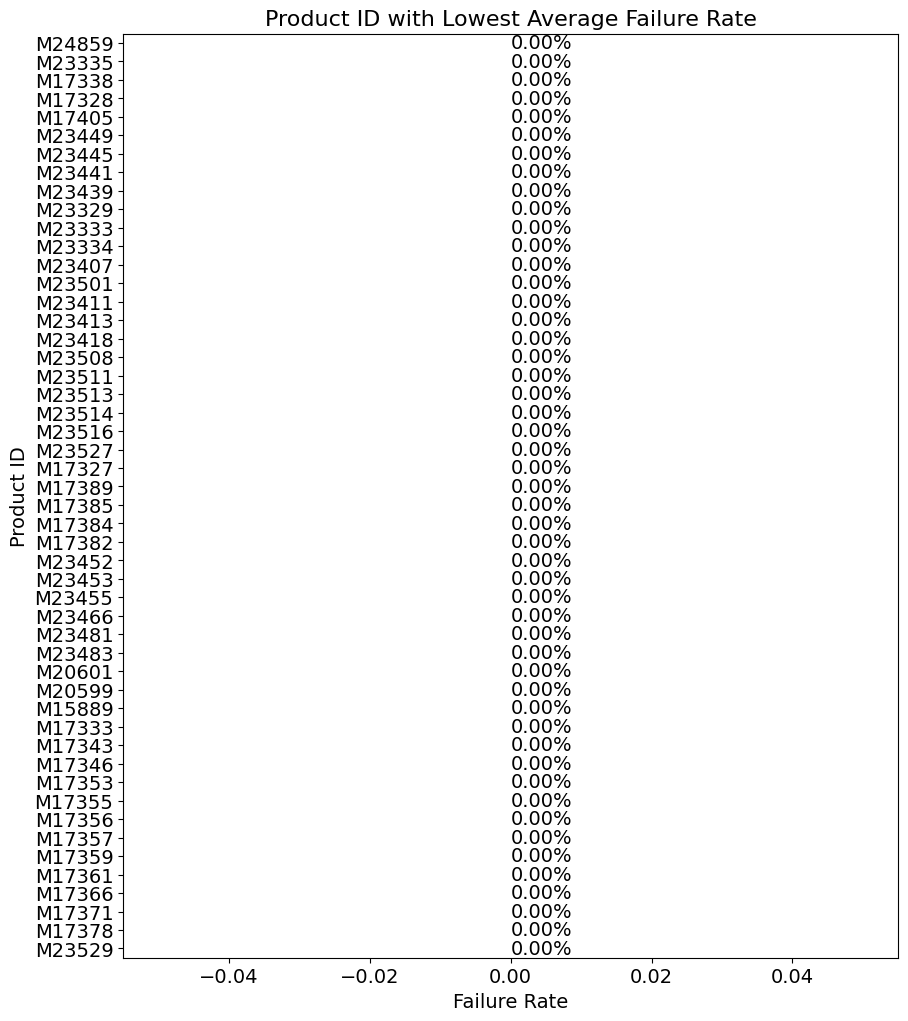

In [270]:
# obtain the top 20 Product ID with the highest failure rate
df_failure_rate.sort_values(ascending=False).tail(50).sort_values().plot(kind='barh', color=color_cycle[0], figsize=(10, 12))
plt.title('Product ID with Lowest Average Failure Rate', fontsize=16)
plt.ylabel('Product ID', fontsize=14)
plt.xlabel('Failure Rate', fontsize=14)
# put the percentage on the bars
for i, v in enumerate(df_failure_rate.sort_values(ascending=False).tail(50).sort_values()):
    plt.text(v, i, f"{v:.2f}%", color='black', va='center', fontsize=14)
plt.xticks(rotation=0, ha='center', fontsize=14)
plt.yticks(fontsize=14, rotation=0, ha='right')
plt.show()

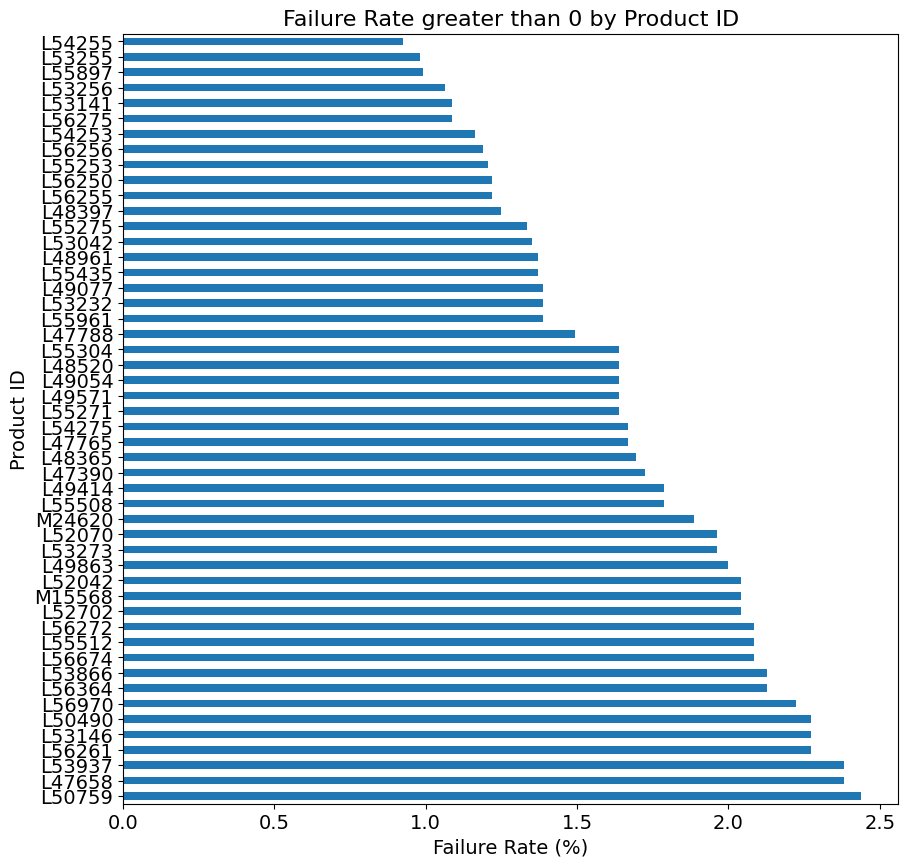

In [271]:
df_failure_rate[df_failure_rate>0].tail(50).plot(kind='barh', color=color_cycle[0], figsize=(10, 10))
plt.title('Failure Rate greater than 0 by Product ID', fontsize=16)
plt.ylabel('Product ID', fontsize=14)
plt.xlabel('Failure Rate (%)', fontsize=14)
plt.xticks(rotation=0, ha='center', fontsize=14)
plt.yticks(fontsize=14, rotation=0, ha='right')
plt.show()

In [272]:
df_failure_rate_count = df_mf_prod_id.groupby('Product ID')['Machine failure'].count().sort_values(ascending=False)

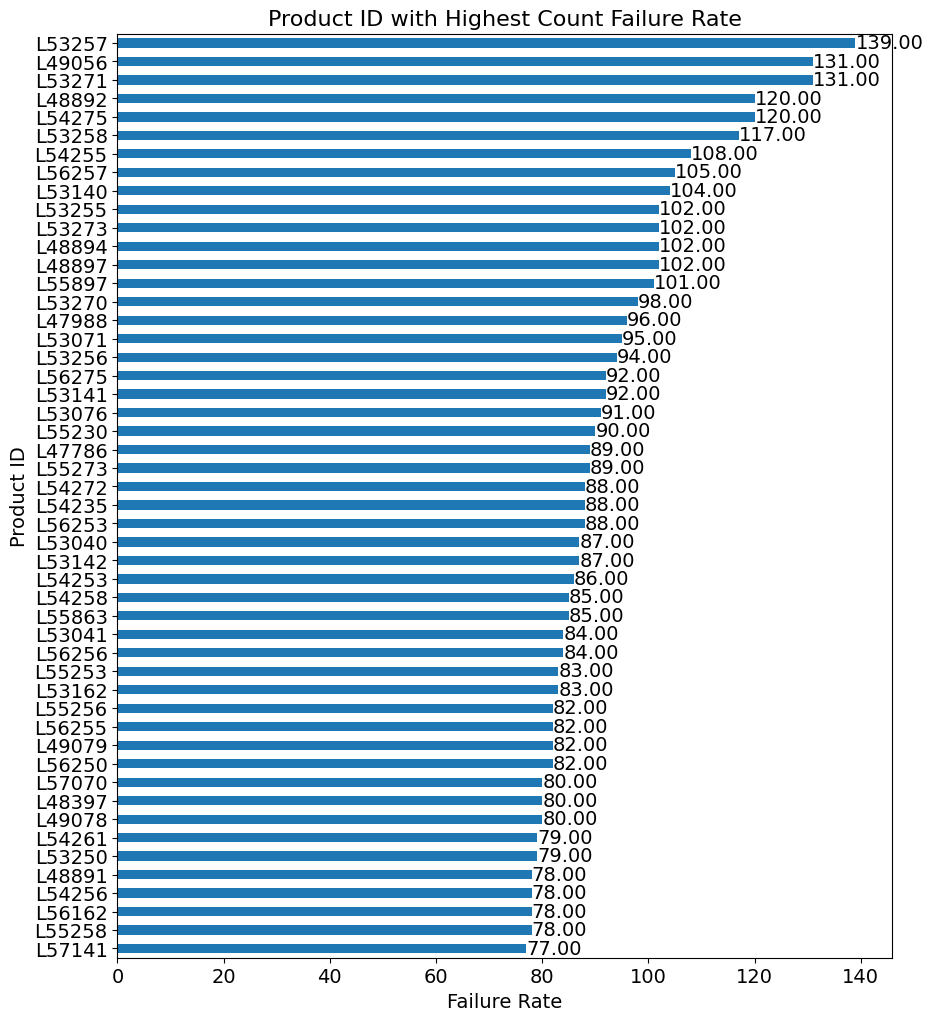

In [273]:
# obtain the top 20 Product ID with the highest failure rate
df_failure_rate_count.sort_values(ascending=False).head(50).sort_values().plot(kind='barh', color=color_cycle[0],figsize=(10, 12))
plt.title('Product ID with Highest Count Failure Rate', fontsize=16)
plt.ylabel('Product ID', fontsize=14)
plt.xlabel('Failure Rate', fontsize=14)
# put the percentage on the bars
for i, v in enumerate(df_failure_rate_count.sort_values(ascending=False).head(50).sort_values()):
    plt.text(v, i, f"{v:.2f}", color='black', va='center', fontsize=14)
plt.xticks(rotation=0, ha='center', fontsize=14)
plt.yticks(fontsize=14, rotation=0, ha='right')
plt.show()

In [275]:
# drop ID and Product ID
df_mf.drop(columns=['Product ID','id'], inplace=True)
# dummy variables for Type
df_mf = pd.get_dummies(df_mf, columns=['Type'], drop_first=True)

In [276]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
df_mf.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in df_mf.columns.values]


In [277]:
# separate the data into two dataframes train and test by Machine failure using StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_mf, df_mf['Machine failure']):
    train = df_mf.loc[train_index]
    test = df_mf.loc[test_index]
    # separate the target variable
    X_train = train.drop(columns='Machine failure')
    y_train = train['Machine failure']
    X_test = test.drop(columns='Machine failure')
    y_test = test['Machine failure']
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    from sklearn.model_selection import cross_val_score
    from sklearn.ensemble import AdaBoostClassifier
    # ada boost
    rf = AdaBoostClassifier(n_estimators=10, random_state=42)
    # logistic regression
    from sklearn.linear_model import LogisticRegression
    rf = LogisticRegression(random_state=42)
    # naive bayes
    from sklearn.naive_bayes import GaussianNB
    rf = GaussianNB()
    # create a random forest classifier
    rf = RandomForestClassifier(n_estimators=50, random_state=42,max_depth=5)
    # xgboost
    from xgboost import XGBClassifier
    rf = XGBClassifier(n_estimators=1, random_state=42,max_depth=4)

    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    # auc metric
    from sklearn.metrics import roc_auc_score
    print(f'AUC: {roc_auc_score(y_test, y_pred):.2f}')



Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26856
           1       0.99      0.79      0.87       430

    accuracy                           1.00     27286
   macro avg       0.99      0.89      0.94     27286
weighted avg       1.00      1.00      1.00     27286

[[26851     5]
 [   92   338]]
AUC: 0.89
Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26856
           1       0.99      0.77      0.86       430

    accuracy                           1.00     27286
   macro avg       1.00      0.88      0.93     27286
weighted avg       1.00      1.00      1.00     27286

[[26854     2]
 [  101   329]]
AUC: 0.88


<Axes: title={'center': 'Machine Failure'}, xlabel='Machine failure'>

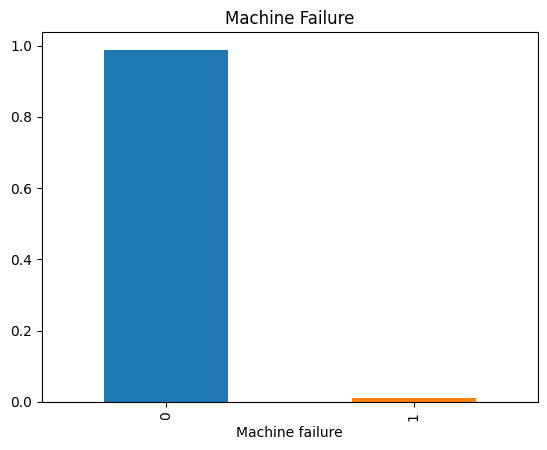

In [278]:
# apply the model in test.csv
df_test = pd.read_csv('playground-series-s3e17/test.csv')
df_test.drop(columns=high_corr, inplace=True)
df_test.drop(columns=['Product ID','id'], inplace=True)
df_test = pd.get_dummies(df_test, columns=['Type'], drop_first=True)
df_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in df_test.columns.values]
# separate the target variable
X_test = df_test
#y_test = df_test['Machine failure']
y_pred = rf.predict(X_test)
X_test['Machine failure'] = y_pred
X_test['Machine failure'].value_counts(normalize=True).plot(kind='bar', title='Machine Failure', color=color_cycle[0:2])
